In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic2"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import load_excel, load_odin_as_ml_dataset, plot_confusion_matrix, make_ml_dataset, run_binary_regression, transport_modes, trip_motives, province_codes

Changed to c:\Users\flori\OneDrive - TU Eindhoven\Master TUe 2024-2025\Design-of-AI-driven-business-operation


In [2]:
year = 2022
odin_excel_path = os.path.join(os.getcwd(), "data", "OdiN 2019-2023", f"OdiN {year}", f"ODiN{year}_Databestand.csv")
df = load_excel(odin_excel_path)

Loaded file from CSV


In [3]:
len(df), len(df["OPID"].unique())

(200054, 61953)

In [4]:
# Here just in case
year = 2022
odin_excel_path = os.path.join(os.getcwd(), "data", "OdiN 2019-2023", f"OdiN {year}", f"ODiN{year}_Databestand.csv")
df = load_excel(odin_excel_path)
df = df[df["Verpl"] == 1]
len(df)

Loaded file from CSV


172256

In [5]:
print(transport_modes)

{1: 'Passenger car', 2: 'Train', 3: 'Bus', 4: 'Tram', 5: 'Metro', 6: 'Speed pedelec', 7: 'Electric bicycle', 8: 'Non-electric bicycle', 9: 'On foot', 10: 'Touring car', 11: 'Delivery van', 12: 'Truck', 13: 'Camper', 14: 'Taxi/Minibus', 15: 'Agricultural vehicle', 16: 'Motorcycle', 17: 'Moped', 18: 'Light moped', 19: 'Mobility aid with motor', 20: 'Mobility aid without motor', 21: 'Skates/inline skates/kick scooter', 22: 'Boat', 23: 'Other with motor', 24: 'Other without motor'}


In [6]:
print(trip_motives)

{1: 'Commuting (to and from work)', 2: 'Business visit (at work location)', 3: 'Occupational (work-related)', 4: 'Picking up/dropping off people', 5: 'Picking up/dropping off goods', 6: 'Education/course attendance', 7: 'Shopping/grocery shopping', 8: 'Visiting/staying over', 9: 'Touring/hiking', 10: 'Sports/hobby', 11: 'Other leisure activity', 12: 'Services/personal care', 13: 'Other motive'}


In [7]:
print(province_codes)

{0: 'No departure point in the Netherlands', 1: 'Groningen', 2: 'Friesland', 3: 'Drenthe', 4: 'Overijssel', 5: 'Flevoland', 6: 'Gelderland', 7: 'Utrecht', 8: 'North Holland', 9: 'South Holland', 10: 'Zeeland', 11: 'North Brabant', 12: 'Limburg', 99: 'Unknown'}


In [8]:
df.columns

Index(['OP', 'OPID', 'Steekproef', 'Mode', 'HHPers', 'HHSam', 'HHPlOP',
       'HHLft1', 'HHLft2', 'HHLft3',
       ...
       'RReisduur', 'RReisduurBL', 'RVertStat', 'RAankStat', 'RTSamen',
       'RCorrSnelh', 'RVliegVer', 'FactorH', 'FactorP', 'FactorV'],
      dtype='object', length=247)

Common labels: [False  True]


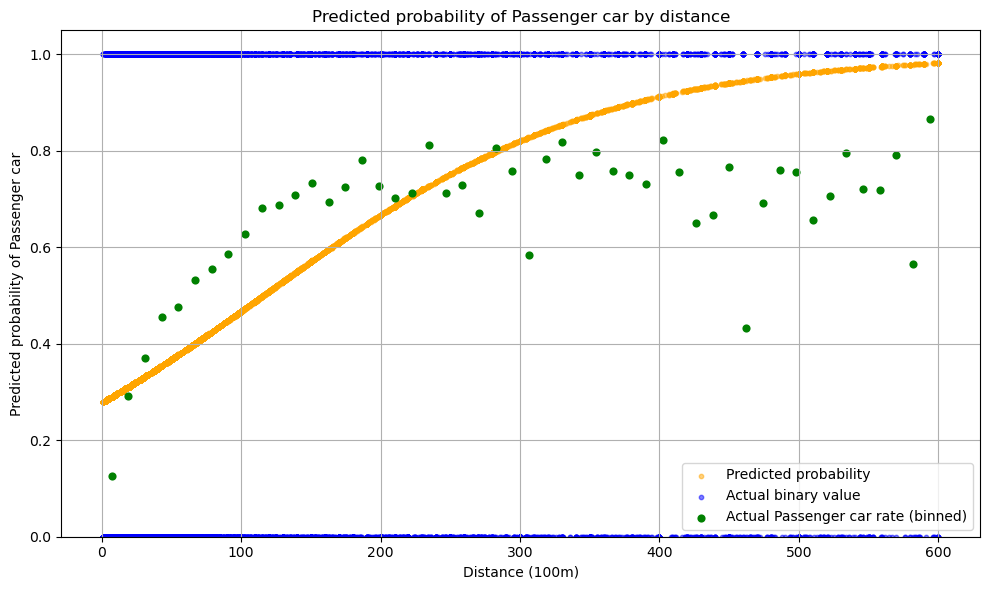

Common labels: [False  True]


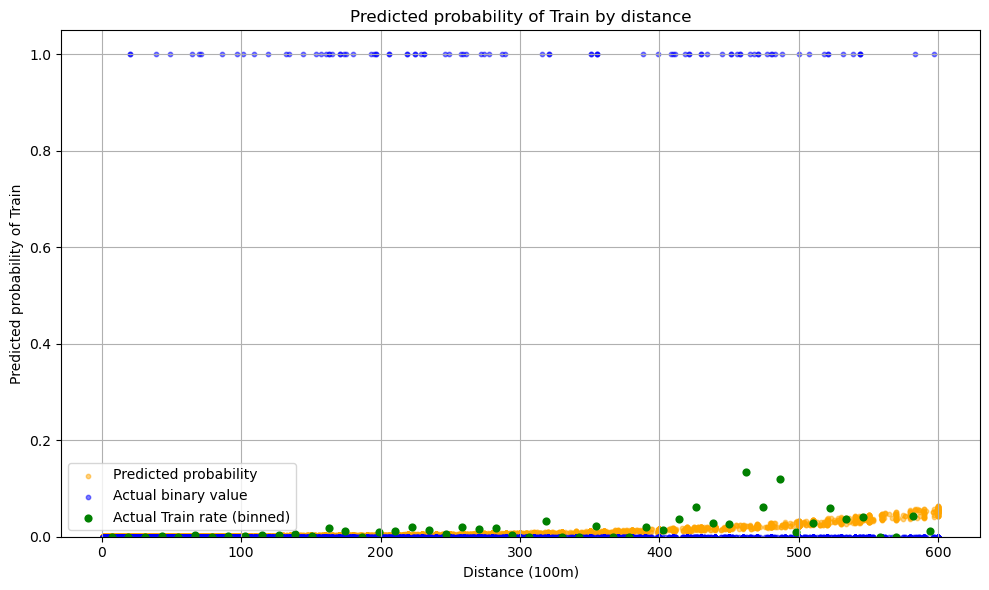

Common labels: [False  True]


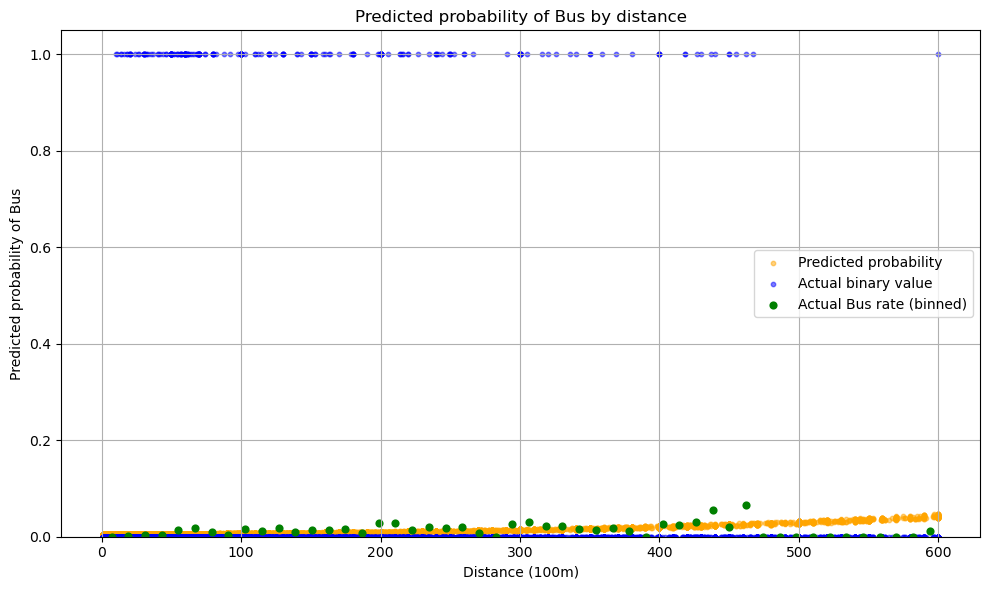

Common labels: [False  True]


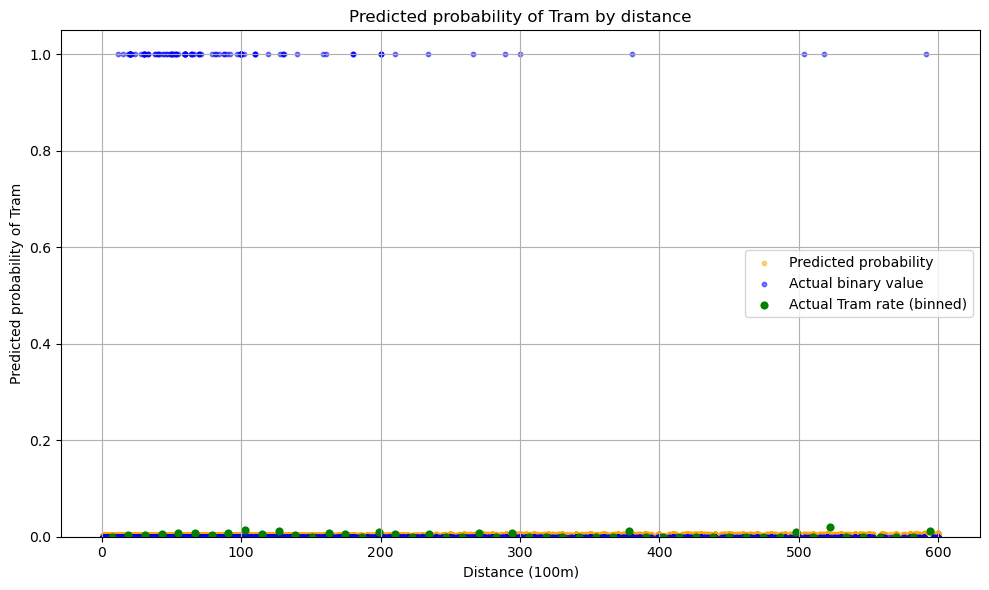

Common labels: [False  True]


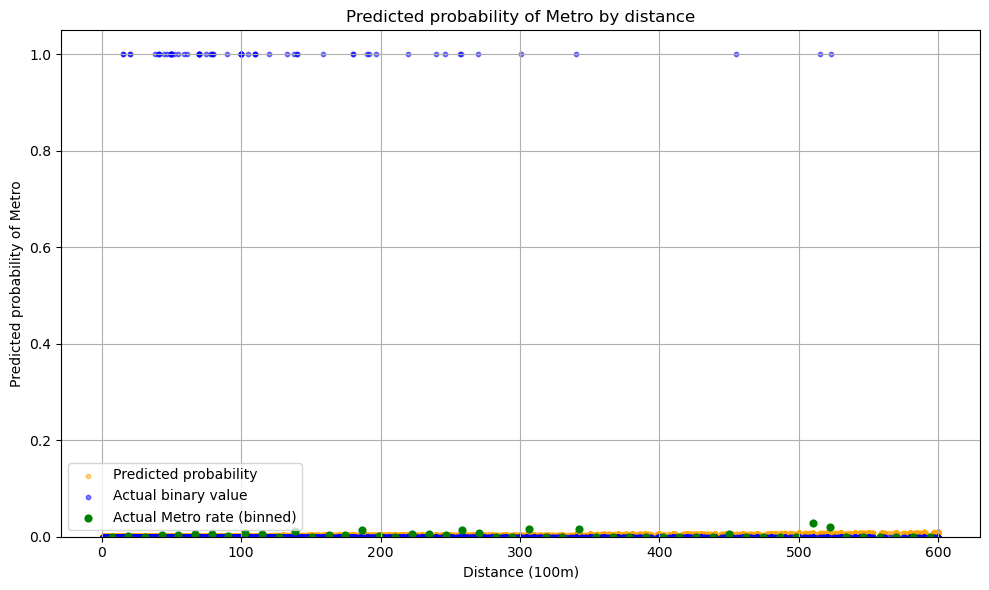

Common labels: [False]
Error fitting the model: This solver needs samples of at least 2 classes in the data, but the data contains only one class: False
Check if the target variable has only one class in the training set.
Common labels: [False  True]


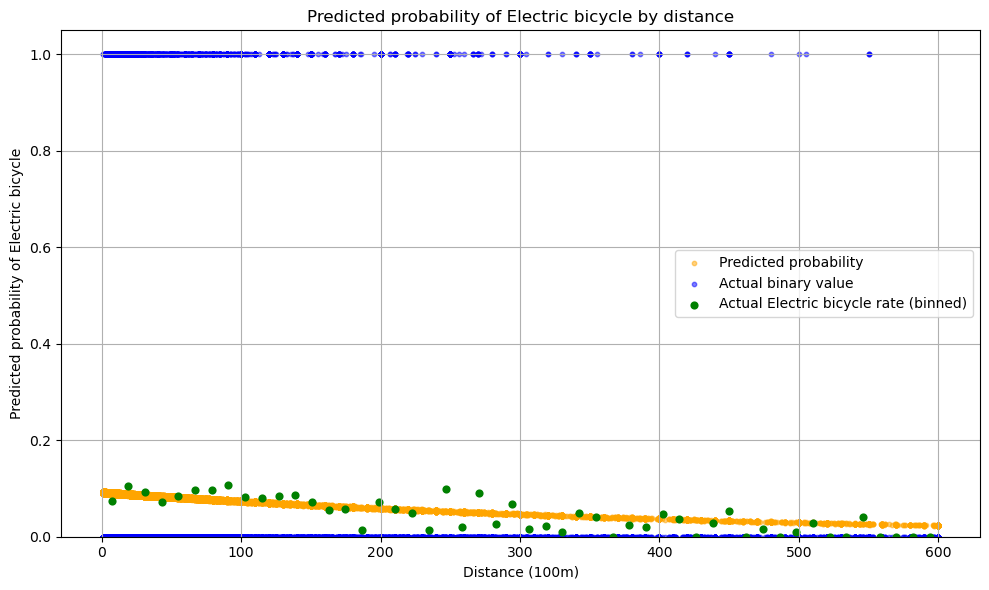

Common labels: [False  True]


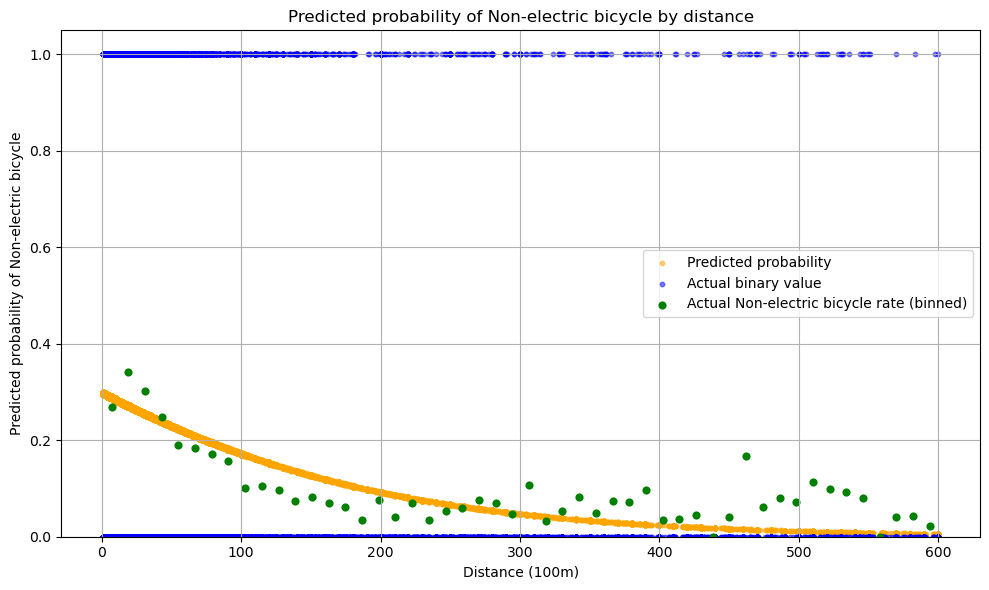

Common labels: [False  True]


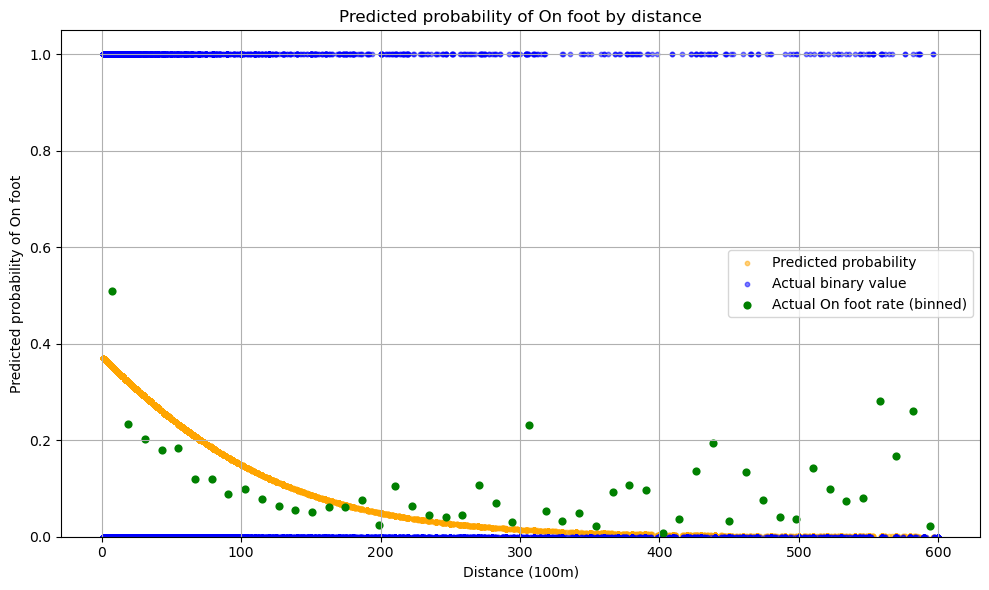

Common labels: [False  True]


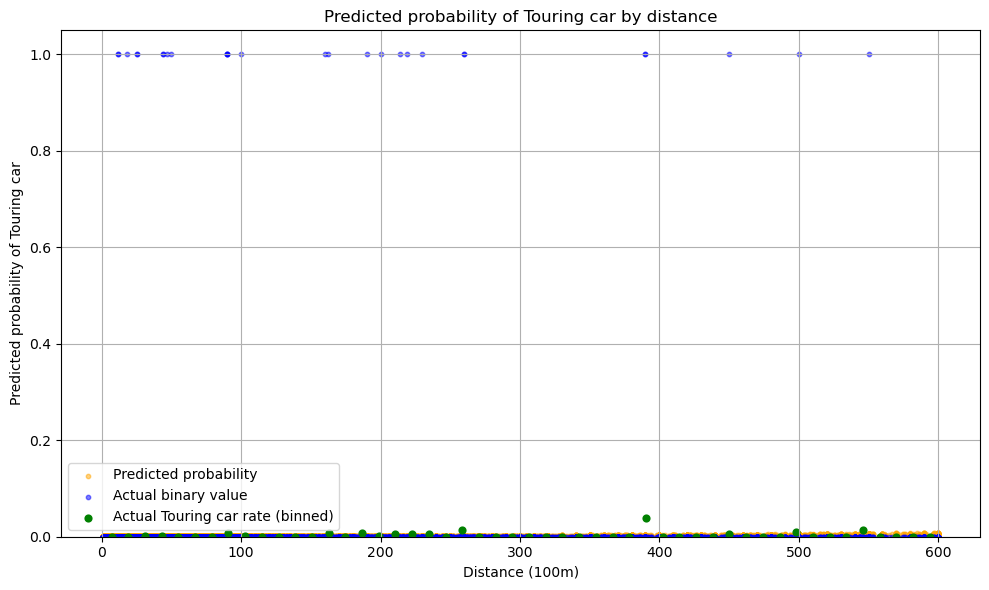

Common labels: [False  True]


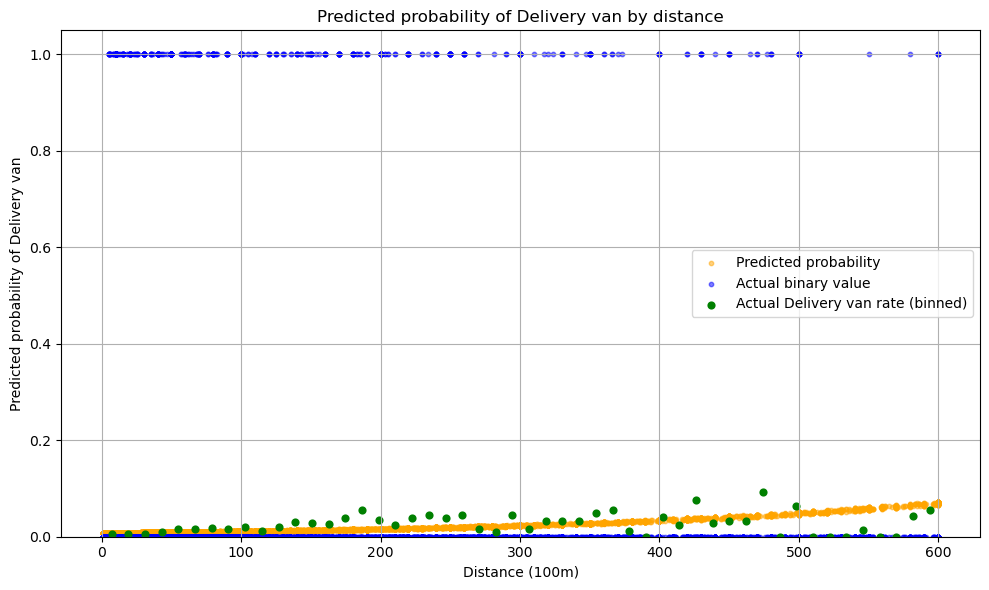

Common labels: [False  True]


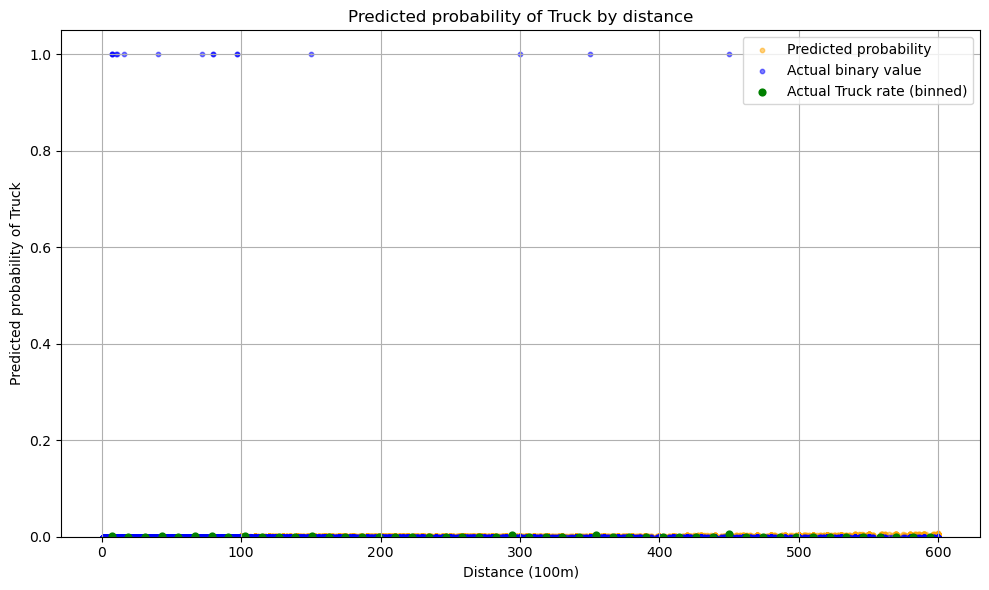

Common labels: [False  True]


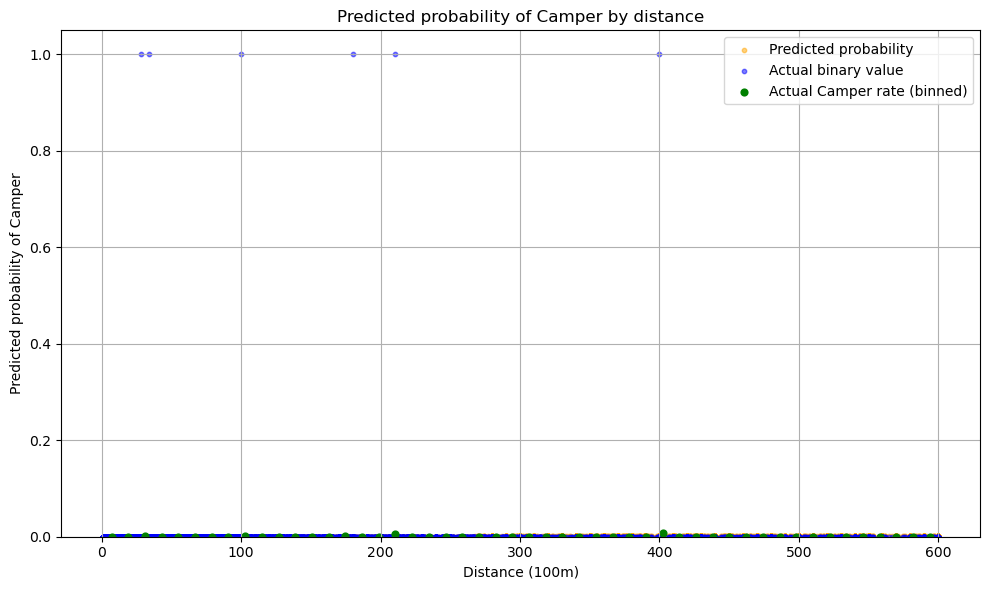

Common labels: [False  True]


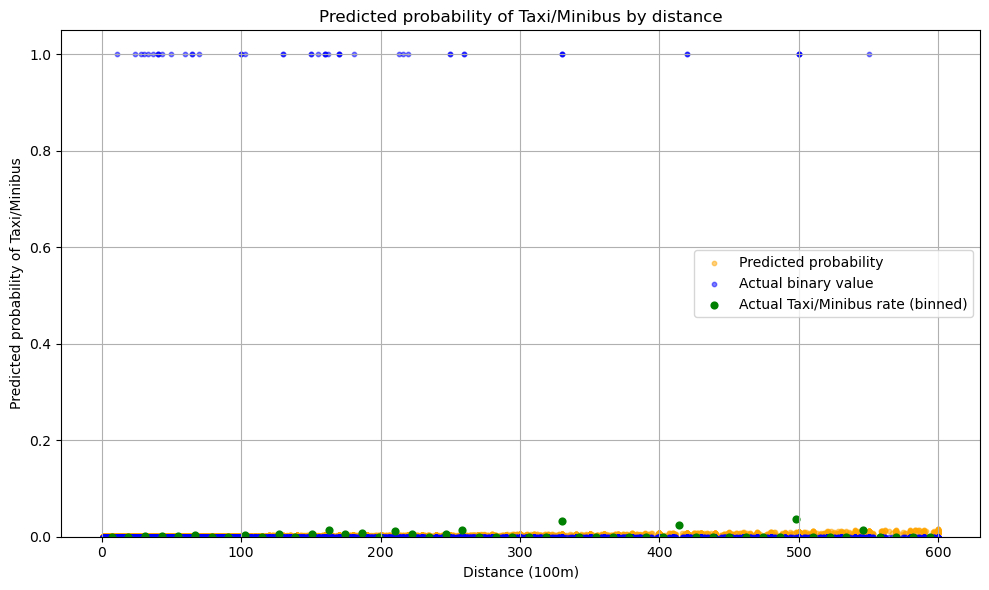

Common labels: [False  True]


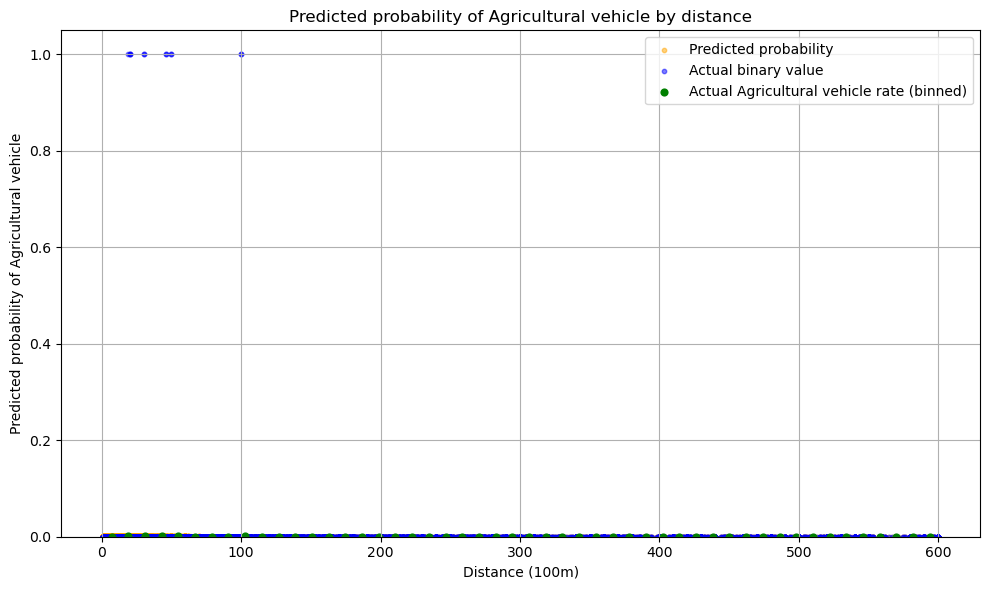

Common labels: [False  True]


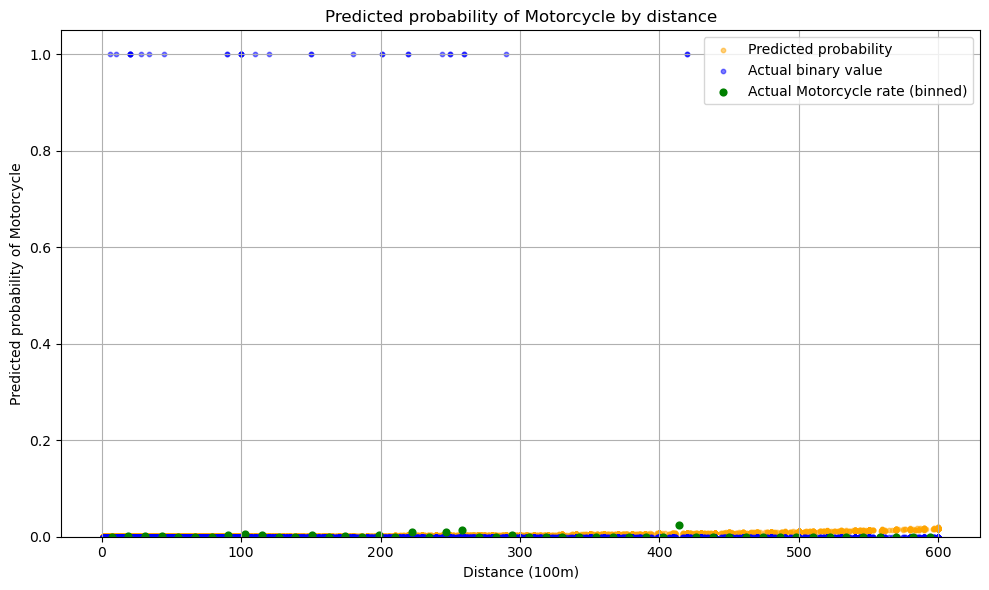

Common labels: [False  True]


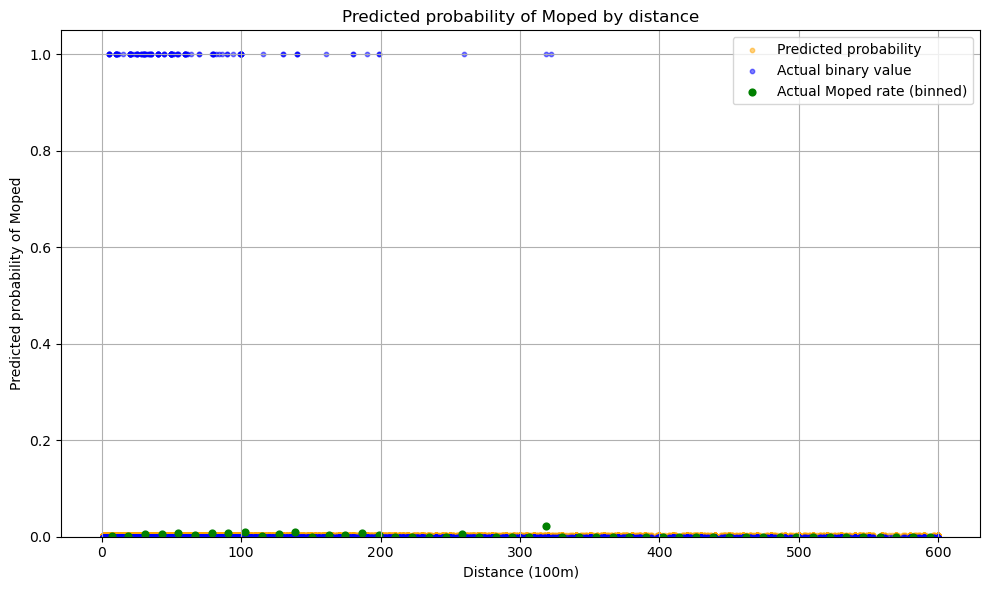

Common labels: [False  True]


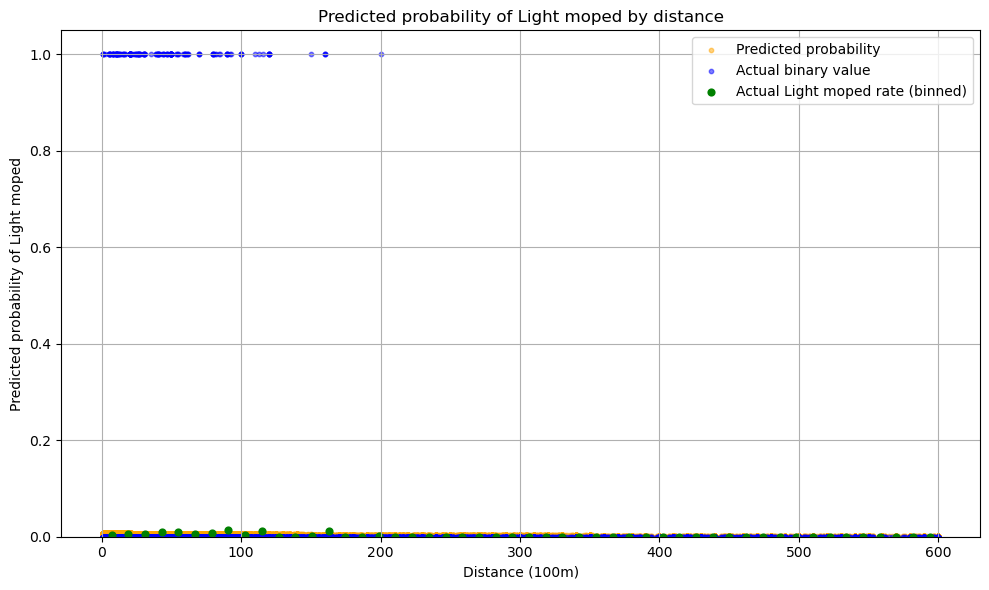

Common labels: [False  True]


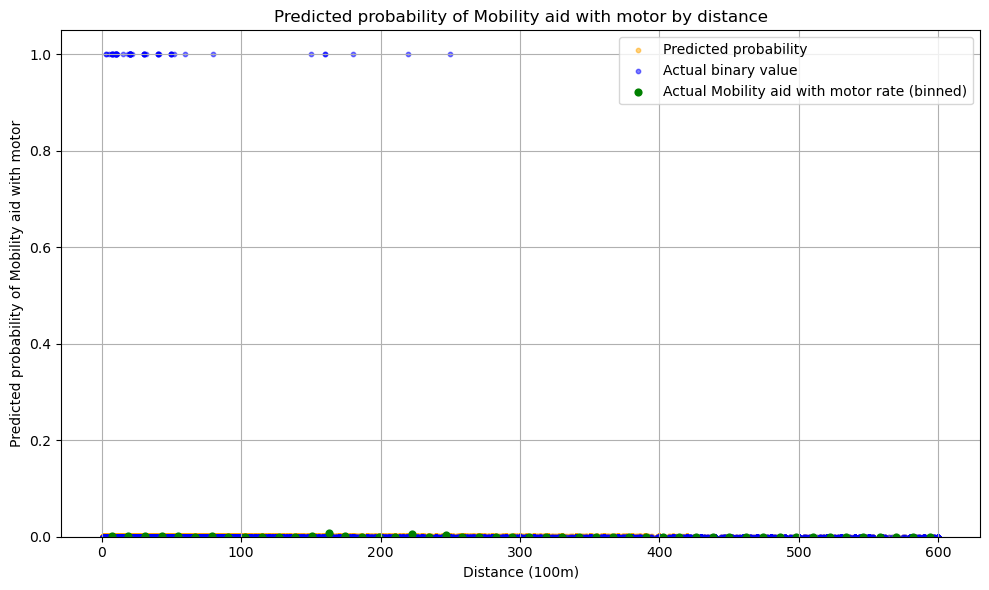

Common labels: [False  True]


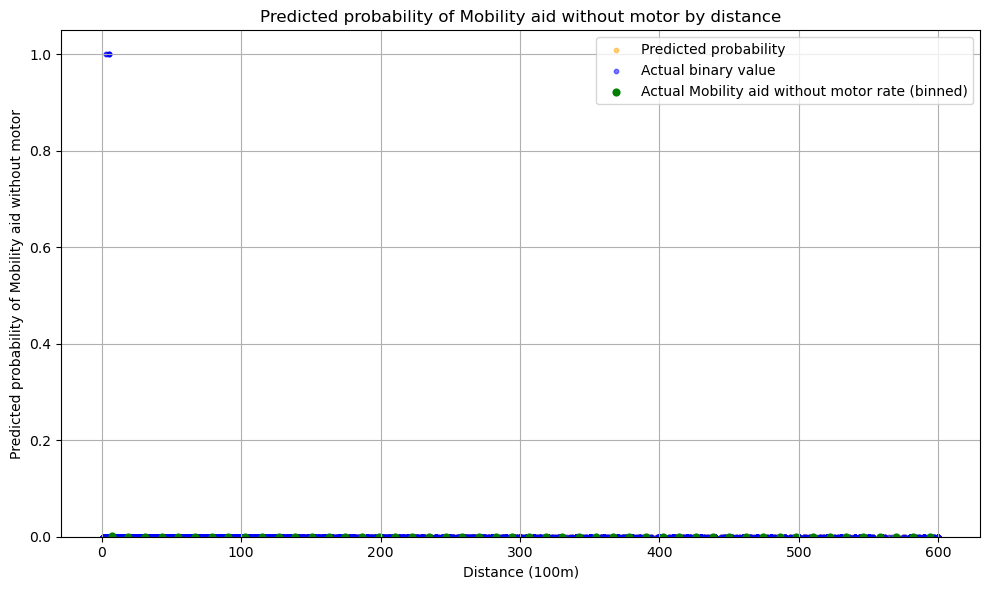

Common labels: [False  True]


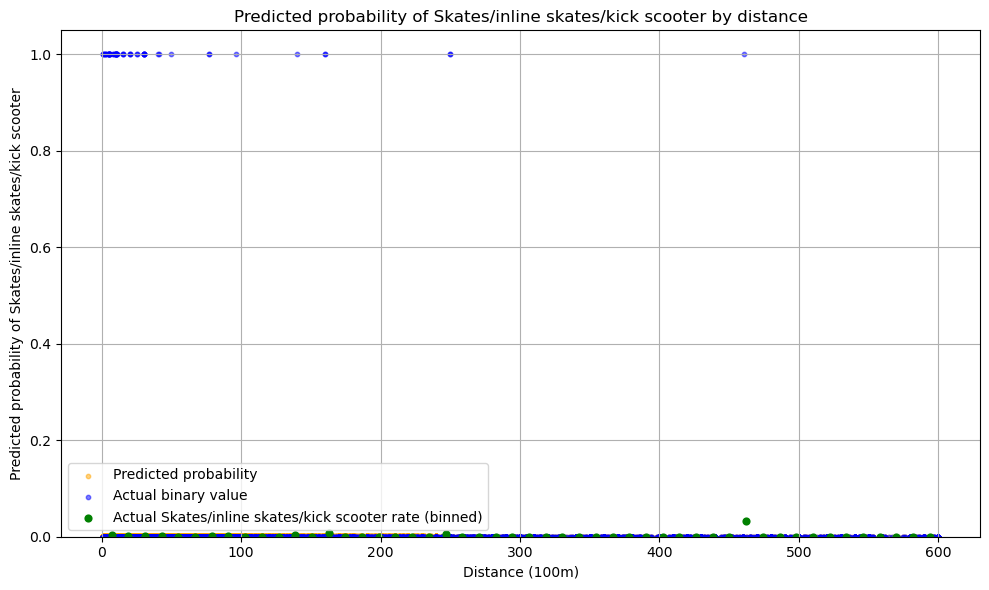

Common labels: [False  True]


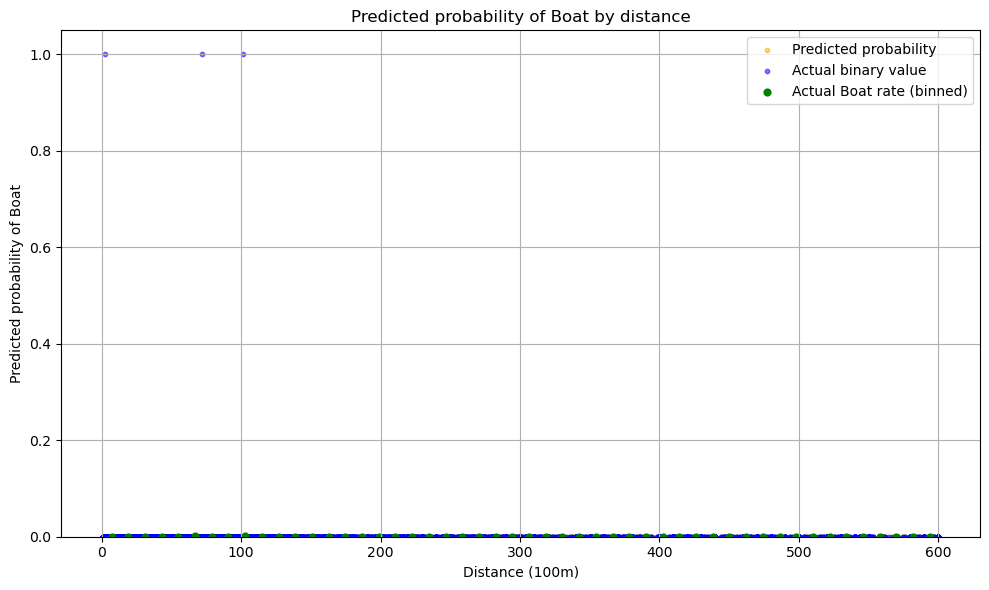

Common labels: [False  True]


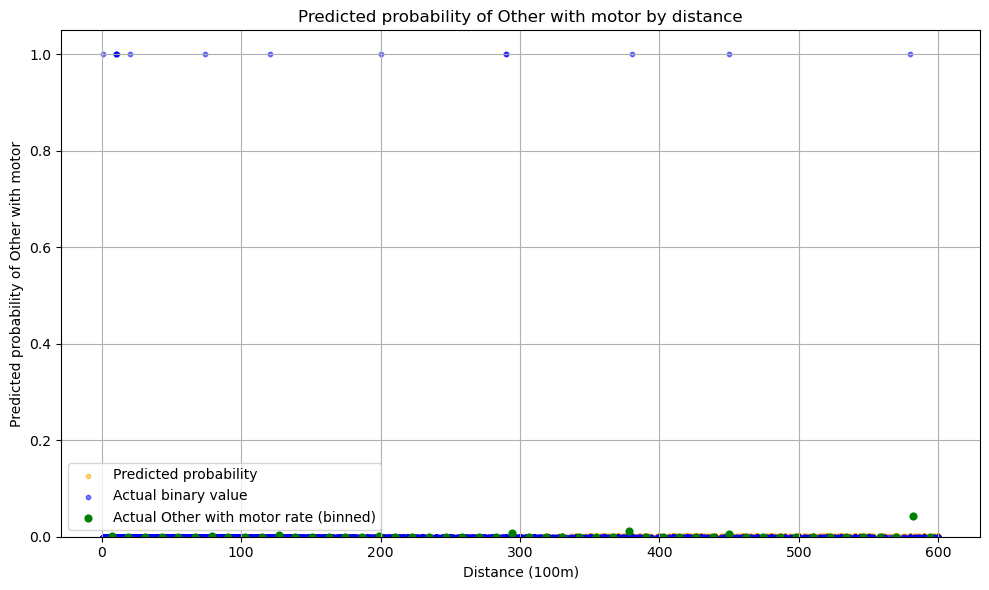

Common labels: [False  True]


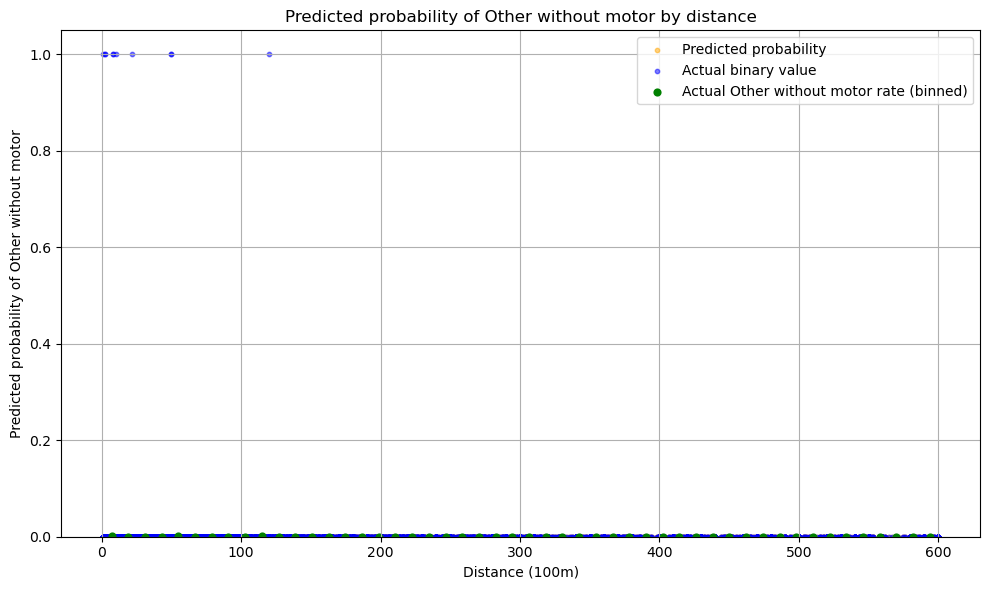

In [9]:
max_dist=600 # max distance in 100s of meters
motives=[1, 2] 

for transport_mode in transport_modes.keys():
    run_binary_regression(
        df,
        test_size=0.2,
        transport_modes_predict=[transport_mode, ],
        motives=None,#motives,
        max_dist=max_dist,
        savename=f"graphics/classification_results/binary_regression/{motives}/{transport_modes[transport_mode].replace(r'/', ' or ')}_{max_dist}",
    )

Common labels: [False  True]


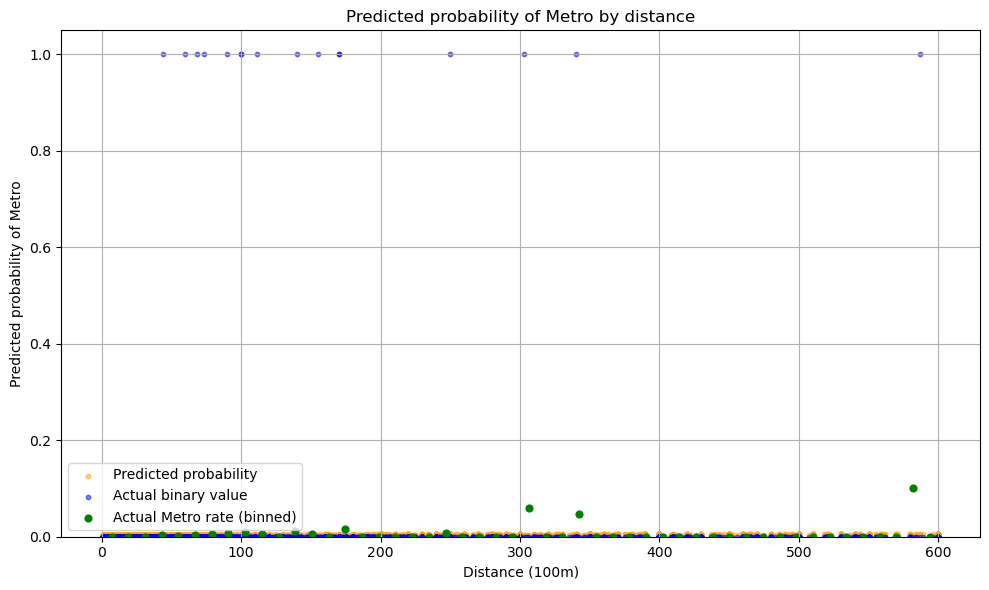

In [10]:
combined_modes = [[5]]
for tm in combined_modes:
    transport_mode_str = ", ".join([transport_modes[tm_] for tm_ in tm])
    run_binary_regression(
        df,
        test_size=0.2,
        transport_modes_predict=[5],
        motives=motives,
        max_dist=max_dist,
        savename=f"graphics/classification_results/binary_regression/{motives}/{transport_mode_str.replace(r'/', ' or ')}_{max_dist}",
    )

Now a classifier that classifies what mode of transport was used

Common labels: [ 1.  2.  3.  4.  5.  7.  8.  9. 10. 11. 12. 14. 15. 16. 17. 18. 19. 21.
 23.]


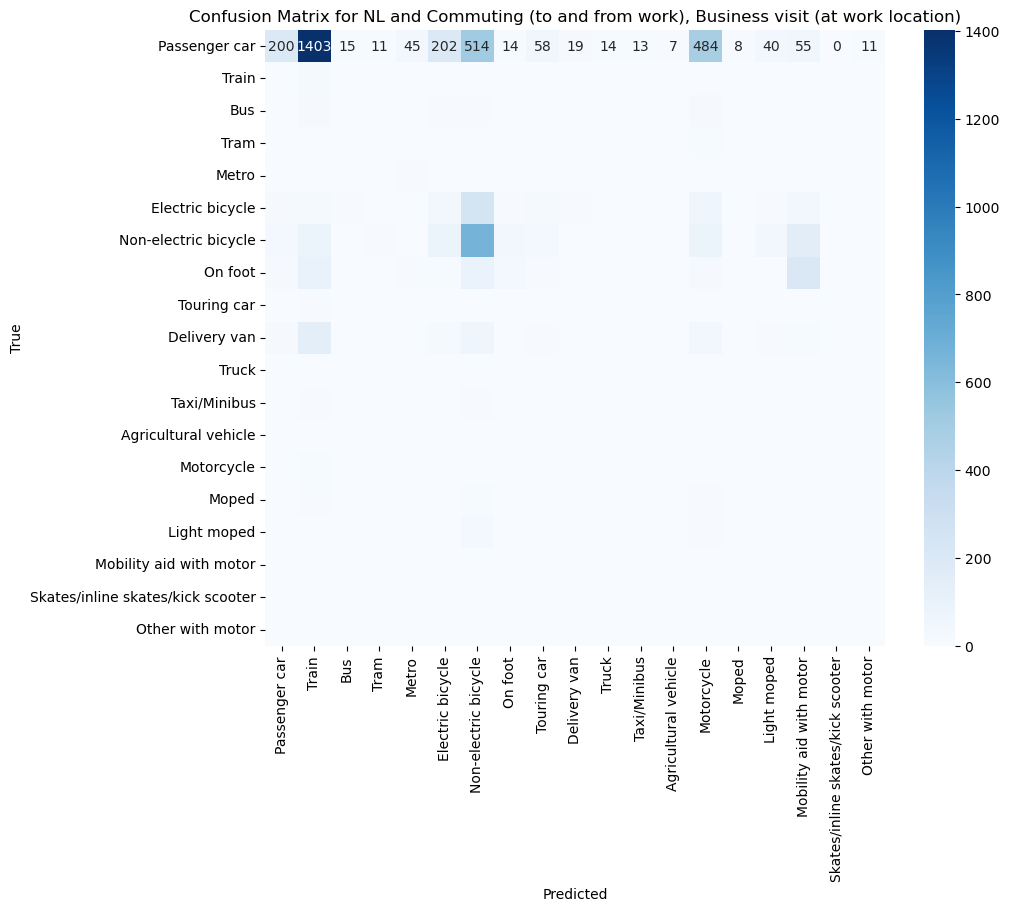

                                   precision    recall  f1-score   support

                    Passenger car       0.66      0.06      0.12      3113
                            Train       0.01      0.68      0.03        38
                              Bus       0.03      0.02      0.02        60
                             Tram       0.04      0.04      0.04        26
                            Metro       0.09      0.35      0.14        17
                 Electric bicycle       0.12      0.09      0.10       528
             Non-electric bicycle       0.40      0.54      0.46      1238
                          On foot       0.30      0.07      0.11       508
                      Touring car       0.01      0.08      0.01        13
                     Delivery van       0.10      0.01      0.02       338
                            Truck       0.09      0.20      0.12        10
                     Taxi/Minibus       0.00      0.00      0.00        15
             Agricultura

(Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(class_weight='balanced', max_depth=10,
                                         n_jobs=-1, random_state=42))]),
 (                OPID  AfstV  VertPC_1011.0  VertPC_1012.0  VertPC_1013.0  \
  4       300000883980  430.0          False          False          False   
  6       300000883980  400.0          False          False          False   
  8       300000886980  170.0          False          False          False   
  9       300000886980  170.0          False          False          False   
  11      300000887980  380.0          False          False          False   
  ...              ...    ...            ...            ...            ...   
  199992  309998779880  290.0          False          False          False   
  199993  309998779880  334.0          False          False          False   
  199996  309998788880  370.0          False      

In [11]:
from codebase import run_multiclass_classification, distance_col, origin_col, province_codes, level_mapping_suffix, duration_col, transport_mode_col

df_multiclass = df[df[transport_mode_col] != df[transport_mode_col].max()]
motives=[1, 2]
origins=None#[7, 8, ]
location_level=2
categorical_features=[origin_col]
numerical_features=[distance_col]
origin_str = ', '.join(province_codes[code] for code in origins) if origins is not None else "NL"
motive_str = ', '.join(trip_motives[motive] for motive in motives) if motives is not None else "all motives"

run_multiclass_classification(
    df_multiclass,
    test_size=0.2,
    destinations=None,
    origins=origins,
    location_level=location_level,
    categorical_features=categorical_features,
    numerical_features=numerical_features,
    motives=motives,
    plot=True,
    savename=f"graphics/classification_results/multiclass/{level_mapping_suffix[location_level]}/{origins}/{motives}/{categorical_features + numerical_features}",
    plot_title=f"Confusion Matrix for {origin_str} and {motive_str}",
)